# Xarray

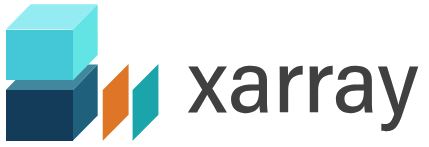

Previous classes explored Pandas, a popular package for working with tabular data (i.e. rows and columns). Pandas powerful features include indexing by row and column names and flexible methods to average over multiple columns or groups. 

Many geoscience datasets are ***multidimensional*** (or *N-dimensional*), meaning that they have many independent dimensions. For example, temperature in Earth's atmosphere is a function of latitude, longitude, altitute and time, making it a four-dimensional variable
$$T(x,y,z,t).$$
Pandas isn't well suited for 2-D and higher dimensional data, but xarray is!

Xarray supports pandas-like features with multidimensional data.

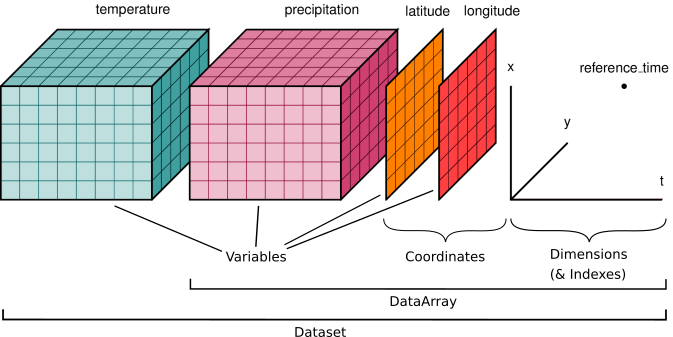

## Important Terms

**NetCDF**

NetCDF (Network Common Data Format) is a widely used file format for multi-dimensional data. NetCDF files are self-describing, meaning they contain both the data values and metadata needed to understand them (e.g. coordinates, units, version, data source). 

NetCDF filenames usually end with '.nc' or '.nc4'.

Xarray is designed for working with netCDF files.

**DataArray**

A single multi-dimensional variable, with its coordinates and attributes.

Corresponds to a NetCDF variable.

**Dataset**

A dict-like collection of multiple DataArray objects that potentially share coordinates. 

Corresponds to a NetCDF file (which often contains multiple variables)

**Dimension**

The names of dimension axes of a DataArray (e.g. 'x', 'y', 'z', 'latitude', 'longitude', 'altitude')

**Coordinate**

An array that provides values for a dimension. For a dimension 'latitude', the coordinate would be the values (e.g. -90, -45, 0, 45, 90).  



## Reading a netCDF file

In [ ]:
# Conventional way to import xarray
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Open a NetCDF file with xarray
merra2 = xr.open_dataset('datasets/MERRA2.2d_selected.20181010.nc4',engine='netcdf4')

In [ ]:
# Dataset contents (interactive mode)
merra2

# Non-interactive
# print( merra2.info() )

## DataArray

A DataArray has four essential attributes
* `values`: a numpy.ndarray holding the array’s values
* `dims`: dimension names for each axis (e.g., ('x', 'y', 'z'), ('time','lat','lon'))
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: a dictionary to hold metadata (attributes)


In [ ]:
# Select a DataArray from a Dataset like a dictionary
da = merra2['PS']

In [ ]:
# DataArray contents (interactive mode)
da

In [ ]:
# Access DataArray attributes
#da.values
# da.dims
# da.coords
# da.attrs

In [ ]:
merra2['time']

#### Exercise

Explore the `merra2` Dataset using the commands above.

1. What does the variable named 'H1000' represent and what are its units?
2. What variable contains sea-level pressure? 

In [ ]:
# Write your code here
merra2['H1000'].attrs['units']

## Selecting or Indexing

Xarray provides `.sel()` and `.isel()` methods to select elements and slices of a Dataset or DataArray

`isel()` selects by the index position (similar to pandas `.iloc[]`)

`sel()` selects by coordinate value (similar to pandas `.loc[]`)

In [ ]:
# 1st time element, 10th latitude, 5th longitude
da.isel(time=0, lat=9, lon=4)

In [ ]:
# Select the location closest to Tallahassee
da.sel(lat=30.44, 
       lon=-84.28, 
       time='2018-10-10 12:00', 
       method='nearest' )

In [ ]:
# We *can* use numpy indexing on DataArrays, but that's usually not

# Select the 1st time, 2nd latitude, 3rd longitude
da[0,1,2]

# Recall da.dims is (time,lat,lon)


Selection works on the same for `Dataset` and `DataArray`

In [ ]:
# Select 1st time step of *all variables* in a Dataset
time1 = merra2.isel(time=0)
time1

Use `slice()` to select a range of values.

In [ ]:
# Select a region over the contiguous United States
merra2_conus = merra2.sel(lon=slice(-130,-60), 
                          lat=slice(25,52))
merra2_conus

Use a `list` to select multiple specific values

In [ ]:
# Select a few discrete values
da.isel(lat=[0,100,200,300],
        lon=10,
        time=0)       
        

#### Exercise

In MERRA2, the surface variables are averaged over 1-hour and the time is marked at the middle of the time interval. For example, the first value is average over 00:00-1:00 UTC and it is labeled at 00:30: '2018-10-10T00:30:00'. 

1. What is was the pressure in Tallahassee (30.44 °N, 84.28 °W) for 0-1 UTC on this day? (You should find 98693.54 Pa)
2. What was the pressure in Tallahassee at hour 23-24 UTC?

In [ ]:
# Write your code here
merra2['PS'].sel(lat=30.44, 
       lon=-84.28, 
       time='2018-10-10 00:30', 
       method='nearest' )

merra2['PS'].sel(lat=30.44, 
       lon=-84.28,
       method='nearest' ).isel(time=-1)

merra2.sel(lat=30.44, 
       lon=-84.28,
       method='nearest' ).isel(time=-1)['PS']

## Plotting

Plotting in xarray works much like pandas:
1. Select part of the Dataset or DataArray (if desired)
2. Use the `.plot()` method; xarray chooses the appropriate plot type
3. Combine with Matplotlib commands as needed.

[xarray plotting guide](https://docs.xarray.dev/en/latest/user-guide/plotting.html)

In [ ]:
# Select one time slice (result is 2D) and display
merra2['PS'].isel(time=0).plot()

# Notice that xarray knows & uses the DataArray and coordinate units

In [ ]:
# Also subset latitude and longitude
merra2['PS']\
    .isel(time=0)\
    .sel(lat=slice(25,52),
         lon=slice(-130,-66))\
    .plot()

In [ ]:
# Select a time series at a location
da.sel(lat=30.44, 
       lon=-84.28,
       method='nearest' )\
    .plot( ylim=(98000,101000) ) 
# xarray's plot command has lots of optional formatting arguments

In [ ]:
# Plot multiple lines
da.sel(lat=[30,40,50], 
       lon=0,
       method='nearest' )\
    .plot.line(x='time')

In [ ]:
# 3D variables are plotted as a histogram by default
da.plot(bins=100)

In [ ]:
# Scatter plot of two variables
merra2.isel(time=0)\
    .plot.scatter(x='PS',y='T2M')

In [ ]:
# Quiver
merra2_conus.isel(time=0)\
    .plot.quiver(x='lon',y='lat',u='U10M',v='V10M')

Xarray plotting works well with Matplotlib, just like pandas. 

In [ ]:
# Create a two panels
fig, axs = plt.subplots( ncols=2, figsize=(8,4) )
ax0, ax1 = axs

# Plot a map in the left panel
merra2['PS'].isel(time=0).plot( ax=ax0 )

# Annotate Tallahassee using standard Matplotlib commands
ax0.scatter(-84.28,30.44,color='black')
ax0.text(-84.28,30.44,'Tallahassee')

# Plot a time series in the right panel
merra2['T2M']\
    .sel(lat=30.44, 
       lon=-84.28,
       method='nearest' )\
    .plot( ax=ax1 )

# Automatic fix spacing between panels
# fig.tight_layout()

The [User Guide](https://docs.xarray.dev/en/latest/user-guide/plotting.html) describes additional plotting capabilities.

#### Exercise

Plot a time series of sea-level pressure for Mexico Beach, FL (29.9 °N, 85.4 °W) for this date


In [ ]:
# Write your code here
merra2['SLP']\
    .sel(lat=29.9,
         lon=-85.4,
        method='nearest')\
    .plot()

#### Exercise

Plot a map of sea-level pressure over the region 25-30 °N, 80-90 °W, for the first time in the dataset. (Reminder: use slice())

In [ ]:
# Write your code here
merra2['SLP']\
    .sel(lat=slice(25,30),
         lon=slice(-90,-80))\
    .isel(time=0)\
    .plot()


## Computation

`DataArrays` and `Datasets` work seamlessly with arithmethtic operators and numpy array functions.

In [ ]:
# Convert Pa -> hPa
da_hPa = merra2['PS'] / 100
# Update the units attribute
da_hPa.attrs['units'] = 'hPa'

da_hPa.isel(time=0).plot()

DataArrays can be easily added to a Dataset (like adding columns to a pandas DataFrame or keys to a dictionary).

In [ ]:
# Add DataArray to the merra2 Dataset
merra2['PS_hPa'] = da_hPa
merra2

#### Exercise

MERRA2 doesn't contain the wind speed, but we can create it from the U and V components. 

1. Create a variable named 'WS10M' that contains wind speed. Recall that $s=\sqrt{u^2+v^2}$.
2. Set the units for the new variable.

In [ ]:
# Write your code here
merra2['WS10M'] = np.sqrt( merra2['U10M']**2 + merra2['V10M']**2 )
merra2['WS10M'].attrs['units'] = 'm s-1'
merra2

## Broadcasting & Alignment

### Broadcasting
Broadcasting is tricky with numpy arrays but much easier with labeled dimensions.

This is a useless calculation, but illustrates operating on `DataArrays` with different coordinates.

In [ ]:
# lat and lon are 1-D arrays with different lengths
lat_times_lon = np.cos(merra2['lat']*np.pi/180) \
              * np.sin(merra2['lon']*np.pi/180)
# Product is 2-D
lat_times_lon.plot()

### Alignment

For operations with two DataArrays that share a dimension name, xarray *aligns* the coordinates first. 

To illustrate, subset the data, then do arithmetic.

In [ ]:
# Create subsets for illustration
da_tropics = da.sel(lat=slice(-23.5,23.5))
da_nh      = da.sel(lat=slice(0,90))

# Multiply
prod = da_tropics * da_nh

# Inspect coordinates of the product
# Product contains coordinates that were in *both* factors; *inner join*
prod['lat']

Alternately, `xr.align(..., join='outer')` can expand both factors with missing data.

## Creating DataArrays

Datasets and DataArrays are most commonly defined by opening and reading a file. However, we can explicitly create them as well. 

In [ ]:
# DataArray of number of days in each month, non-leap years
ndays = xr.DataArray([31,28,31,30,31,30,31,31,30,31,30,31],
                   dims=('month'),
                   coords={'month':np.arange(1,13)})
print( ndays.sel(month=2).values )
ndays

## Combining Data: Concat and Merge

* `xr.concat`: concatenate DataArrays into a bigger *DataArray*, extending their dimensions
* `xr.merge`: combine DataArrays or Datasets into a larger *Dataset*

To illustrate concat, we will split the data into northern and southern hemispheres and then recombine them.

In [ ]:
# Split into northern and southern hemisphere
NH = merra2.sel(lat=slice(0,90))
SH = merra2.sel(lat=slice(-90,0))

In [ ]:
# Concatenate two Datasets along the 'lat' dimension
# Works the same for DataArrays
ds_concat = xr.concat( [SH, NH], dim='lat')
ds_concat

We can also concatenate along a *new* dimension

In [ ]:
# Create a new dimension while concatenating
ds_concat = xr.concat( [SH, NH], dim='hemi')

In [ ]:
ds_concat['PS'].isel(time=0,hemi=1).plot()

Merging:

In [ ]:
# Merge a list of DataArrays or Datasets into a single Dataset
xr.merge( [merra2['PS'], merra2['T2M']] )

In [ ]:
xr.concat( [NH,SH], dim='hemisphere' )

## Reductions

Xarray can compute the mean, sum, standard deviation and other statistics across any dimension of a DataArray, just like Numpy. Xarray data reductions can refer to dimension names (rather than axis in Numpy), which adds clarity.

In [ ]:
# Average over time
da_time_mean = da.mean(dim='time')
da_time_mean.plot()

In [ ]:
# Zonal (average over longitude) and Time mean
da_mean = da.mean(dim=['lon','time'])

da_mean.plot()

Reduction methods include
* `mean()`
* `min()`, `max()`, `median()`
* `quantile()`
* `std()`
* `sum()`
* and others

#### Exercise

1. What was the mean sea-level pressure in Tallahassee (30.4 °N, 84.3 °W) on this date?
2. What was the minimum sea-level pressure?

## Weighted reductions

For some averages (and other reductions), some elements of the array should have greater weight than others. For example, the MERRA2 grid cells (0.5° $\times$ 0.625°) have larger surface area near the equator than near the poles, which should be accounted for in global averages.  

In [ ]:
# Artificial weights based on hour of the day
weights = np.sin( merra2['time'].dt.hour * np.pi/24 )**2
weights.plot()

In [ ]:
# Weighted mean
T2M_weighted_mean = merra2['T2M'].weighted(weights).mean(dim='time')
# Unweighted (equal weights) mean
T2M_unweighted_mean = merra2['T2M'].mean(dim='time')


In [ ]:
# Plot the weighted mean and compare to unweighted
T2M_weighted_mean.sel(lat=50,method='nearest').plot(label='weighted')

T2M_unweighted_mean.sel(lat=50,method='nearest').plot(label='unweighted')

plt.legend()

## Online datasets

Numerous datasets are available online through protocols that provide access to data *without* first downloading a file (e.g. THREDDS, OpenDAP, S3). Xarray can access many of these protocols in almost exactly the same way as locally stored files.

Advantages of online or cloud data access:
* Less storage required on local computer
* Faster access if only a small part of a large file is required

Advantages of downloading a data file:
* Reading a local file is faster than over a network
* Available offline; insensitive to network outages, server changes
* Better for repeated data access 

In [ ]:
# Open NOAA Extended Reconstructed Sea Surface Temperature (ERSST) version 5
ersst = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')
ersst

In [ ]:
# Plot SST
ersst['sst'].isel(time=-1).plot()

## Xarray is "***lazy***" (a good thing)

Lazily-evaluated operations do not load data into memory until necessary. Instead of doing calculations right away, xarray lets you plan what calculations you want to do, like finding the average temperature in a dataset. This planning is called “lazy evaluation.” Later, when you’re ready to see the final result, you tell xarray, “Okay, go ahead and do those calculations now!” That’s when xarray starts working through the steps you planned and gives you the answer you wanted. This lazy approach helps save time and memory because xarray only does the work when you actually need the results.

For example, a program may read a file containing multiple variables over a large domain (e.g. global) but creates a figure or prints a value for just a single variable and single site. Xarray only loads the data into memory that it needs, saving the computational effort and time of loading and processing all data in the file.